# Creating grid model with DAVE (full automatic)

This Tutorial will introduce you into the DAVE datastructure and how to create a grid model full automatic through the main function. DAVE is a python based Softwaretool which automaticly collects open data from diffrent datasources and combine them to a energy model. The only necessary informations the user must input are the area and the grid levels which should contained in the model. Furthermore there are some optional parameters to make the model more suitable to the own use case. For a description how DAVE works inside, have a look at this [publication](https://doi.org/10.1038/s41598-024-52199-w ).

A example python script including the following code you can additionaly find in the DAVE_core examples folder directory (example_create_dataset.py).

## Import DAVE_core main function

First, we import the create_grid function from DAVE_core. For the full automatic way of creating a grid model with DAVE it is the only function we need.  

In [1]:
from dave_core.create import create_grid

## Define grid area

It is necessary for DAVE to know the region where the grid model should generate. For that DAVE offers five diffrent ways to input your defined grid area. You have the choise which option is the most suitable for you. **Note:** you can only use one input variatation per function call. 

For a better overview examples for all five Options are given below. 

### 1. Postal codes (limited to germany)

**Format**: List of strings

**Single postalcode:** \
['34225'] \
**Multiple postalcodes:** \
['37085', '37075', '37083', '37079', '37081', '37073', '37077'] \
**All postalcodes:** \
['ALL']

### 2. Town names (limited to germany)

**Format**: List of strings \
**Note**: The input is not case sensitive

**Single town name:** \
['Göttingen'] \
**Multiple town names:** \
['KAsSel', 'Baunatal'] \
**All town names:** \
['ALL'] 

### 3. Federal states (limited to germany)

**Format**: List of strings \
**Note**: The input is not case sensitive

**Single federal state name:** \
['Hessen'] \
**Multiple federal state names:** \
['HeSsEn', 'SchleSWIg-HOLstein'] \
**All federal state names:** \
['ALL'] 

### 4. Nuts regions (limited to europe)

**Format**: List of strings

**Note**: You can input all diffrent nuts level and also combine them. Furthermore there are diffrent years available

**Single nuts region:** \
['DE'] (nuts level 0)\
**Multiple nuts regions:** \
['DE11A', 'DE11B']  (nuts level 3) \
['DEF', 'DE60']  (combination of diffrent nuts level, level 1 and level 2)

### 5. Own Area

**Format**: String \
**Note**: You need to hand over DAVE the absolute path to your shapefile

In this option the user can hand over a path to a geographical file (.shp or .geojson) which includes polygon(s) or direktly transfer the geometry in polygon format (shapely.polygon) to the main function.
This one is the most individual way to define an area of interest and will considered in this tutorial. 

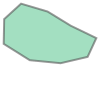

In [2]:
# Example for hand over an own area with a shapefile. The file includes a polygon for Hertingshausen which is a part from the Town Baunatal. (ca. 500 relevant Buildings)
import os
import geopandas as gpd

# define path of an geographical file and read in
own_area_path = os.getcwd()+'\\..\\examples\\hertingshausen.geojson'  
own_area_polygon = gpd.read_file(own_area_path).iloc[0].geometry

# plot polygon
own_area_polygon

## Define grid levels

The second and last necessary input parameter the user must handed over to DAVE is the difinition of the grid levels which should considered. At this time DAVE can generate the topology for all voltage levels in the power sector and for the high pressure level in the gas sector. The plan is that the other gas levels and also heat levels will be follow.

Examples how to define the grid levels are given in the following.

### 1. Power levels

**Format**: List of strings

**Note**: At this time the availible power grid data is restricted to germany. More will following...

The Options for the power grid levels are:
1. EHV (extra high voltage)
2. HV  (high voltage)
3. MV  (medium voltage)
4. LV  (low voltage)

**Single power level:** \
['EHV'] \
**Multiple power levels:** \
['HV', 'MV', 'LV'] \
**All power levels:** \
['ALL']

In [3]:
# Example for power level
power_level = ['lv']  

### 2. Gas levels

**Format**: List of strings \
**Note**: At this time the availible gas grid data is restricted to the high pressure level. More will following... 

The Options for the gas grid levels are:
1. HP (high pressure)

**Single gas level:** \
['HP'] 

## Run DAVE_core main function to generate a grid model

By default all network components (e.g. transformers, power_plants, loads, ...) will be generated too. There are optinal parameters at the create_grid function to disable them.

In [4]:
# --- create grid with DAVE. The result is an low voltage network for the defined polygon
grid_data = create_grid(own_area=own_area_polygon,
                        power_levels=['LV'])

collect geographical data:           100%|█████████████████████████████▉| completed
create low voltage topology:         100%|█████████████████████████████▉| completed
create transformers:                 100%|██████████████████████████████| completed
create renewable powerplants:        100%|█████████████████████████████▉| completed
create conventional powerplants:     100%|██████████████████████████████| completed
create powerplant lines:             100%|██████████████████████████████| completed
create electrical loads:             100%|█████████████████████████████▉| completed
clean up dave dataset:               100%|██████████████████████████████| completed



Save DaVe output data at the following path: C:\Users\tbanze\Desktop\DaVe_output
runtime = 5.01 min


### Get an overviwe about the generated network

In [5]:
grid_data

This DAVE dataset includes the following parameter tables:
   - area (1 element)
   - target_input (1 element)
   - buildings:
	   - commercial (51 elements)
	   - residential (508 elements)
	   - other (41 elements)
   - roads:
	   - roads (197 elements)
   - landuse (116 elements)
   - ehv_data:
   - hv_data:
   - mv_data:
	   - mv_nodes (9 elements)
   - lv_data:
	   - lv_nodes (1256 elements)
	   - lv_lines (1295 elements)
   - components_power:
	   - loads (583 elements)
	   - transformers:
		   - mv_lv (9 elements)
	   - substations:
		   - mv_lv (9 elements)
   - hp_data:
   - mp_data:
   - lp_data:
   - components_gas:
   - eubucco:
   - census_data:

## Plot resulting DAVE network model

To have a view on the resulting data DAVE provides also some plotting functions. 

### Plot geographical data

C:\Users\tbanze\Documents\Git Repos\DAVE_core\src\dave_core\plotting\plot.py:66: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_centroids = buildings_all.centroid


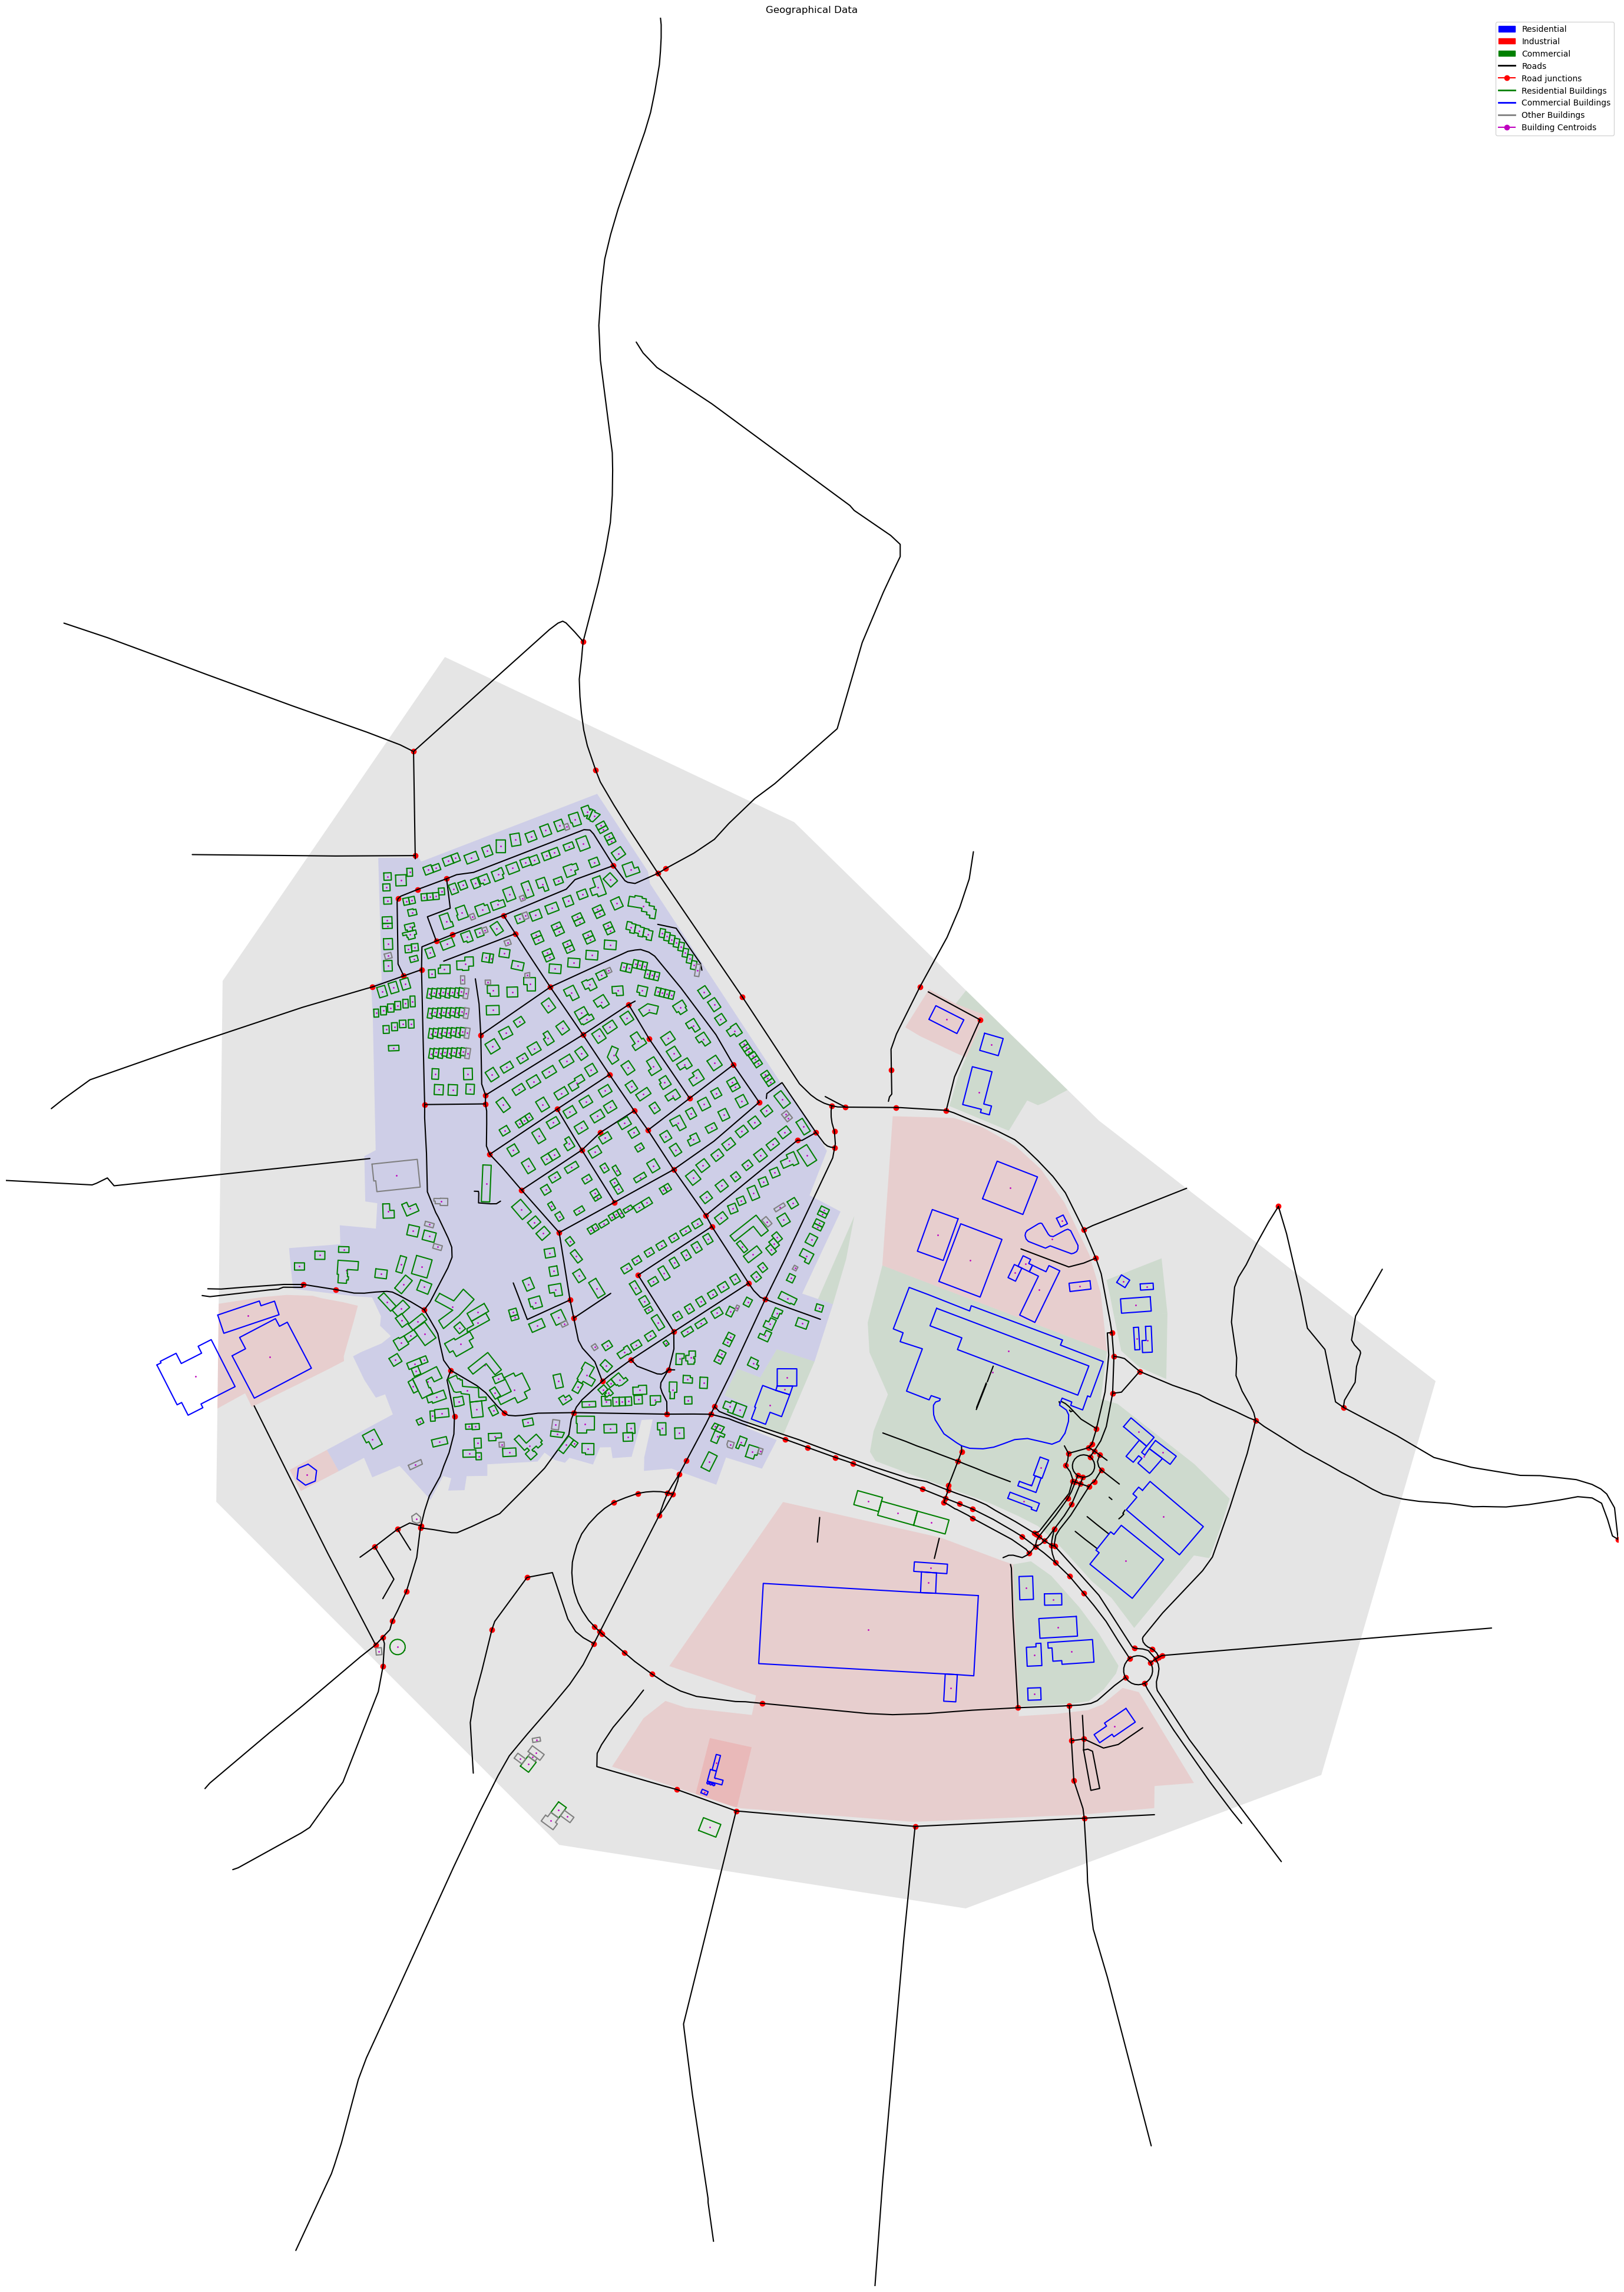

In [19]:
from dave_core.plotting import plot_geographical_data
plot_geographical_data(grid_data)

### Plot network data (with osm map in background)

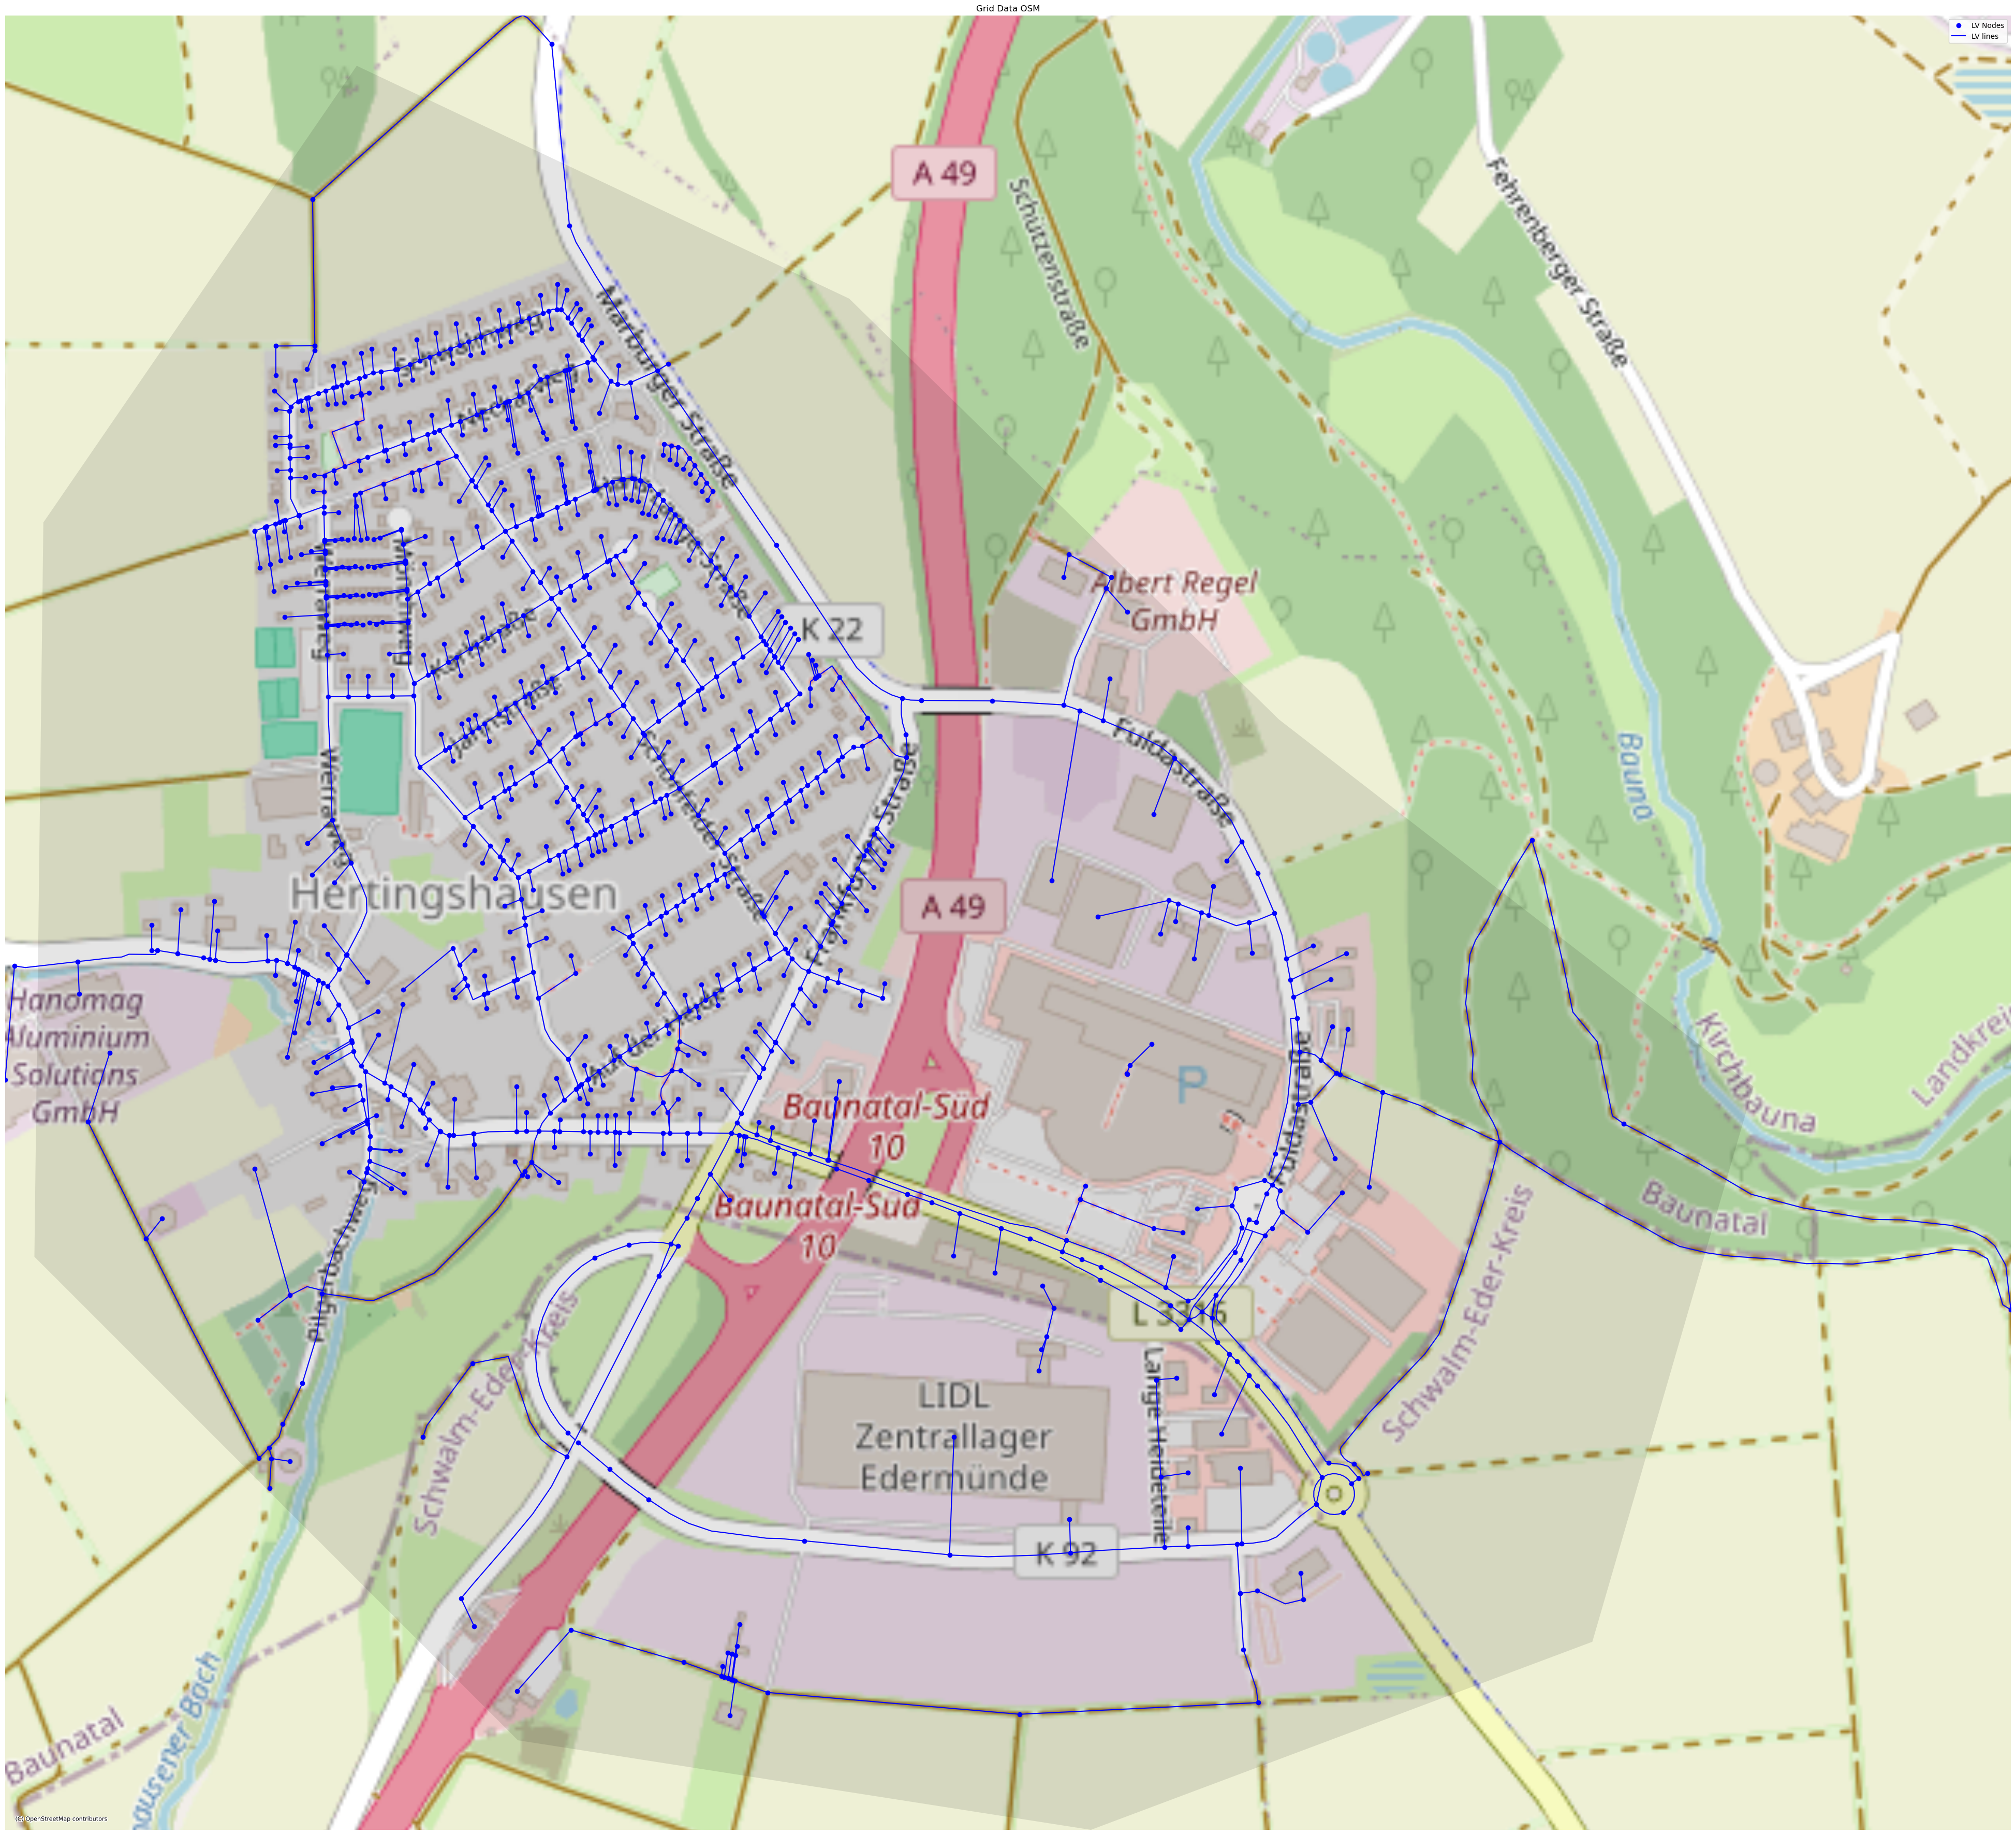

In [22]:
from dave_core.plotting import plot_grid_data_osm
plot_grid_data_osm(grid_data)